## Project Description and Dataset Overview
Craigslist is the world's largest collection of used vehicles for sale, yet it's very difficult to collect all of them in the same place. using scraper for a school project and expanded upon it later to create this dataset which includes every used vehicle entry within the United States on Craigslist.
This data is scraped every few months, it contains most all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, latitude/longitude, and 18 other categories.  

All data utilized in this analysis was sourced from Kaggle. You can access the dataset through the following link: [Here](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data/data?authuser=1)
____
## Columns Description
`ID`  
`url` listing URL.  
`region` craigslist region.  
`region_url` region URL.  
`price` entry price.  
`year` entry year.  
`manufacturer` manufacturer of vehicle.  
`model` model of vehicle.  
`condition` condition of vehicle.  
`cylinders` number of cylinders.  
`fuel` fuel type.  
`odometer` miles traveled by vehicle.  
`title_status` title status of vehicle.  
`transmission` transmission of vehicle.  
`VIN` vehicle identification number.  
`drive` type of drive.  
`size` size of vehicle.  
`type` generic type of vehicle.  
`paint_color` color of vehicle.  
`image_url` image URL.  
`description` listed description of vehicle.  
`county` useless column left in by mistake.  
`state` state of listing.  
`lat` latitude of listing.  
`long` longitude of listing.  
`posting_date`
____
## EDA Questions

**Q1: What are the top regions/states with the highest number of listings?**  
**Q2: How do car listing prices vary by manufacturing year?**  
**Q3: What is the distribution of car sales in different regions or states?**  
**Q4: How does the price vary across different car manufacturers?**  
**Q5: What is the relationship between vehicle condition and price?**  
**Q6: How do fuel types affect vehicle prices?**  
**Q7: What are the most common fuel types used in the listings?**  
**Q8: How do fuel types affect vehicle price, condition, or popularity?**  
**Q9: What are the most common manufacturers and models listed on Craigslist?**  
**Q10: What are the most common transmission types (manual vs automatic) in the dataset?**  
**Q11: How do vehicle prices vary between different transmission types?**  
**Q12: Is there a price difference between vehicles with different drive types (e.g., 4WD vs FWD)?**  
**Q13: What are the most common paint colors in the dataset?**  
**Q14: What are the most common vehicle sizes and types listed?**  
**Q15: How do vehicle sizes/types correlate with price and condition?**

## Environment set-up

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import datetime

# Suppress all warnings
warnings.filterwarnings('ignore')

___
## Data Wrangling 
We'd load our desired data from the flat csv file `vehicles.csv` to a dataframe using `pandas`, and display its first 10 records. here, we want to check for:
- Missingness in our dataframe.
- Inconsistent data types.
- NaNs.
- Duplicated rows.

In [2]:
# Load Data
df = pd.read_csv(r'D:\Courses\# MLSC Data Science & Machine Learning Course\#Tasks\Mid-Course Project\vehicles.csv')

In [3]:
#cheack top rows
df.head(10)

id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   
5  7222379453  https://hudsonvalley.craigslist.org/cto/d/west...   
6  7221952215  https://hudsonvalley.craigslist.org/cto/d/west...   
7  7220195662  https://hudsonvalley.craigslist.org/cto/d/poug...   
8  7209064557  https://medford.craigslist.org/cto/d/grants-pa...   
9  7219485069  https://erie.craigslist.org/cto/d/erie-2012-su...   

                   region                           region_url  price  year  \
0                prescott      https://prescott.craigslist.org   6000   NaN   
1            fayetteville         https://fayar.craigslist.org  11900   NaN   
2            florida keys          https://keys.craigslist.org  21000   NaN   
3  worcester / central MA     https://worcester.craigslist.org   1500   NaN   
4              greensboro    https://greensboro.craigslist.org   4900   NaN   
5           hudson valley  https://hudsonvalley.craigslist.org   1600   NaN   
6           hudson valley  https://hudsonvalley.craigslist.org   1000   NaN   
7           hudson valley  https://hudsonvalley.craigslist.org  15995   NaN   
8         medford-ashland       https://medford.craigslist.org   5000   NaN   
9                    erie          https://erie.craigslist.org   3000   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
1          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
2          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
3          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
4          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
5          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
6          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
7          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
8          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
9          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   

  image_url description county state lat long posting_date  
0       NaN         NaN    NaN    az NaN  NaN          NaN  
1       NaN         NaN    NaN    ar NaN  NaN          NaN  
2       NaN         NaN    NaN    fl NaN  NaN          NaN  
3       NaN         NaN    NaN    ma NaN  NaN          NaN  
4       NaN         NaN    NaN    nc NaN  NaN          NaN  
5       NaN         NaN    NaN    ny NaN  NaN          NaN  
6       NaN         NaN    NaN    ny NaN  NaN          NaN  
7       NaN         NaN    NaN    ny NaN  NaN          NaN  
8       NaN         NaN    NaN    or NaN  NaN          NaN  
9       NaN         NaN    NaN    pa NaN  NaN          NaN  

[10 rows x 26 columns]

In [4]:
# display the number of rows and columns in the dataset
df.shape

(426880, 26)

In [5]:
# check null values
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

**`county`**: Contains 426,880 missing values (all values are missing), so it's best to drop this column as it holds no useful data.  
**`size`**: Contains 306,361 missing values (around 72% of the data is missing). You might consider dropping this column if the missing values are not estimable or not crucial for the analysis.  
**`condition`**: Contains 174,104 missing values (about 41% missing). These data might be important for analyzing the condition of the car, so you can consider replacing the missing values or analyzing the pattern of missing values.  
**`cylinders`**: Contains 177,678 missing values (around 42% missing), and this information might be crucial for analyzing engine performance, so you can attempt to handle the missing values or exclude them if they are not important.

So, We need:
- **Dropping irrelevant columns**: drop the `county` column since it contains 100% missing values, and i think we shouldn't rely on `size` column since it contains 72% missing values.
- **Handling missing values**: Replace the missing values in important columns like `condition` and `cylinders`.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

-We need change data types of `Year` to `int`, `price`, `odometer` to `float` and `posting_date` to `datetime` 

In [7]:
# a statistical view 
df.describe().transpose()

count          mean           std           min           25%  \
id        426880.0  7.311487e+09  4.473170e+06  7.207408e+09  7.308143e+09   
price     426880.0  7.519903e+04  1.218228e+07  0.000000e+00  5.900000e+03   
year      425675.0  2.011235e+03  9.452120e+00  1.900000e+03  2.008000e+03   
odometer  422480.0  9.804333e+04  2.138815e+05  0.000000e+00  3.770400e+04   
county         0.0           NaN           NaN           NaN           NaN   
lat       420331.0  3.849394e+01  5.841533e+00 -8.412225e+01  3.460190e+01   
long      420331.0 -9.474860e+01  1.836546e+01 -1.598277e+02 -1.119398e+02   

                   50%           75%           max  
id        7.312621e+09  7.315254e+09  7.317101e+09  
price     1.395000e+04  2.648575e+04  3.736929e+09  
year      2.013000e+03  2.017000e+03  2.022000e+03  
odometer  8.554800e+04  1.335425e+05  1.000000e+07  
county             NaN           NaN           NaN  
lat       3.915010e+01  4.239890e+01  8.239082e+01  
long     -8.843260e+01 -8.083204e+01  1.738855e+02

In [8]:
df.describe(include='object') 

url    region  \
count                                              426880    426880   
unique                                             426880       404   
top     https://wyoming.craigslist.org/ctd/d/atlanta-2...  columbus   
freq                                                    1      3608   

                            region_url manufacturer   model condition  \
count                           426880       409234  421603    252776   
unique                             413           42   29667         6   
top     https://spokane.craigslist.org         ford   f-150      good   
freq                              2988        70985    8009    121456   

          cylinders    fuel title_status transmission                VIN  \
count        249202  423867       418638       424324             265838   
unique            8       5            6            3             118264   
top     6 cylinders     gas        clean    automatic  1FMJU1JT1HEA52352   
freq          94169  356209       405117       336524                261   

         drive       size    type paint_color  \
count   296313     120519  334022      296677   
unique       3          4      13          12   
top        4wd  full-size   sedan       white   
freq    131904      63465   87056       79285   

                                                image_url  \
count                                              426812   
unique                                             241899   
top     https://images.craigslist.org/00N0N_1xMPvfxRAI...   
freq                                                 7357   

                                              description   state  \
count                                              426810  426880   
unique                                             360911      51   
top     35 VEHICLES PRICED UNDER $3000!!!  BIG TIME! T...      ca   
freq                                                  231   50614   

                    posting_date  
count                     426812  
unique                    381536  
top     2021-04-23T22:13:05-0400  
freq                          12

In [9]:
# check duplicated record
df.duplicated().sum()  # df[df.duplicated()]

np.int64(0)

- our dataset has no duplicated row.

In [10]:
# exploring the unique values of each column
df.nunique()

id              426880
url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64

In [11]:
# List of important columns
important_columns = ['region', 'price', 'year', 'manufacturer', 'model', 'condition', 'fuel', 
                       'odometer', 'transmission', 'drive', 'type', 'paint_color', 'state']

for column in important_columns:
    print(f"Unique values for column '{column}':")
    print(df[column].unique())
    print("\n")


Unique values for column 'region':
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 

## Exploration Summery
1. Our dataset consists of 426880 rows with 26 columns, and has no duplicated row.
2. We need change data types of `Year` to `int`, `price`, `odometer` to `float` and `posting_date` to `datetime`.
3. Drop the `county` and `size`columns.
4. Replace the missing values in columns with `NA`.

## Data Cleaning
**in this section, we'd perform some operations on our dataset based on the previous findings to make our analysis more accurate and clear.**

**Drop the `county` and `size`columns**

In [12]:
# drop columns
df = df.drop(columns = ['county', 'size'])

In [13]:
# checking columns
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'type', 'paint_color', 'image_url',
       'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

**Replace the missing values in columns with `NA`**

In [14]:
# Fill all missing values with 'NA'
df = df.fillna('NA')

# check that the missing values have been filled
print(df.isnull().sum())

id              0
url             0
region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
type            0
paint_color     0
image_url       0
description     0
state           0
lat             0
long            0
posting_date    0
dtype: int64


**Handling `date` data type**

In [15]:
# Replace 'NA' with NaN in the 'year' column
df['year'] = df['year'].replace('NA', np.nan)
# Convert the 'year' column to float first, then to int (after handling NaNs)
df['year'] = df['year'].astype(float)
# Optionally, fill NaNs with a placeholder value like 0 or drop rows with NaNs
df['year'] = df['year'].fillna(0).astype(int)

# Replace 'NA' with NaN in the 'odometer' column
df['odometer'] = df['odometer'].replace('NA', np.nan)
# Convert the 'odometer' column to float (NaNs will remain as NaNs)
df['odometer'] = df['odometer'].astype(float)


# Replace 'NA' with NaN in the 'posting_date' column
df['posting_date'] = df['posting_date'].replace('NA', np.nan)
# Convert 'posting_date' to datetime

df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')

# Checking changes
print(df.dtypes)

id                int64
url              object
region           object
region_url       object
price             int64
year              int64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
type             object
paint_color      object
image_url        object
description      object
state            object
lat              object
long             object
posting_date     object
dtype: object


In [16]:
#check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          426880 non-null  int64  
 6   manufacturer  426880 non-null  object 
 7   model         426880 non-null  object 
 8   condition     426880 non-null  object 
 9   cylinders     426880 non-null  object 
 10  fuel          426880 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  426880 non-null  object 
 13  transmission  426880 non-null  object 
 14  VIN           426880 non-null  object 
 15  drive         426880 non-null  object 
 16  type          426880 non-null  object 
 17  paint_color   426880 non-null  object 
 18  imag

In [17]:
df.head(10)

id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   
5  7222379453  https://hudsonvalley.craigslist.org/cto/d/west...   
6  7221952215  https://hudsonvalley.craigslist.org/cto/d/west...   
7  7220195662  https://hudsonvalley.craigslist.org/cto/d/poug...   
8  7209064557  https://medford.craigslist.org/cto/d/grants-pa...   
9  7219485069  https://erie.craigslist.org/cto/d/erie-2012-su...   

                   region                           region_url  price  year  \
0                prescott      https://prescott.craigslist.org   6000     0   
1            fayetteville         https://fayar.craigslist.org  11900     0   
2            florida keys          https://keys.craigslist.org  21000     0   
3  worcester / central MA     https://worcester.craigslist.org   1500     0   
4              greensboro    https://greensboro.craigslist.org   4900     0   
5           hudson valley  https://hudsonvalley.craigslist.org   1600     0   
6           hudson valley  https://hudsonvalley.craigslist.org   1000     0   
7           hudson valley  https://hudsonvalley.craigslist.org  15995     0   
8         medford-ashland       https://medford.craigslist.org   5000     0   
9                    erie          https://erie.craigslist.org   3000     0   

  manufacturer model condition cylinders  ... VIN  drive type paint_color  \
0           NA    NA        NA        NA  ...  NA     NA   NA          NA   
1           NA    NA        NA        NA  ...  NA     NA   NA          NA   
2           NA    NA        NA        NA  ...  NA     NA   NA          NA   
3           NA    NA        NA        NA  ...  NA     NA   NA          NA   
4           NA    NA        NA        NA  ...  NA     NA   NA          NA   
5           NA    NA        NA        NA  ...  NA     NA   NA          NA   
6           NA    NA        NA        NA  ...  NA     NA   NA          NA   
7           NA    NA        NA        NA  ...  NA     NA   NA          NA   
8           NA    NA        NA        NA  ...  NA     NA   NA          NA   
9           NA    NA        NA        NA  ...  NA     NA   NA          NA   

  image_url description state lat long posting_date  
0        NA          NA    az  NA   NA          NaT  
1        NA          NA    ar  NA   NA          NaT  
2        NA          NA    fl  NA   NA          NaT  
3        NA          NA    ma  NA   NA          NaT  
4        NA          NA    nc  NA   NA          NaT  
5        NA          NA    ny  NA   NA          NaT  
6        NA          NA    ny  NA   NA          NaT  
7        NA          NA    ny  NA   NA          NaT  
8        NA          NA    or  NA   NA          NaT  
9        NA          NA    pa  NA   NA          NaT  

[10 rows x 24 columns]

**We endded up with a datafram of 426,880 rows and 26 columns, and everything looks tidy and clean. We'd proceed in visualizing it to extract meaningful insights from it.**
____

## Data Visualization and EDA
Now that our data is clean, we'd perform some EDA on it in order to extract useful insights from it.

**What are the top regions/states with the highest number of listings?**

In [18]:
# Get the top regions with the highest number of listings
top_regions = df['region'].value_counts().head(10)
print(top_regions)

region
columbus                    3608
jacksonville                3562
spokane / coeur d'alene     2988
eugene                      2985
fresno / madera             2983
orlando                     2983
bend                        2982
omaha / council bluffs      2982
new hampshire               2981
kennewick-pasco-richland    2981
Name: count, dtype: int64


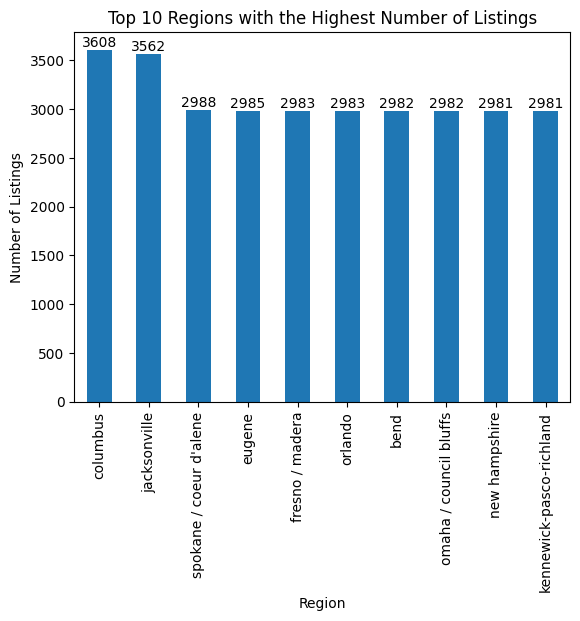

In [19]:
ax = top_regions.plot(kind='bar', title='Top 10 Regions with the Highest Number of Listings')
plt.xlabel('Region')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90)

# Add data labels
ax.bar_label(ax.containers[0])

# Show the plot
plt.show()


`The top regions with the highest number of listings are dominated by areas like Columbus, Jacksonville, and Spokane / Coeur d'Alene. Columbus leads with 3,608 listings, followed closely by Jacksonville with 3,560, indicating a high concentration of car listings in these regions. These regions may have larger populations or higher demand for cars, which could explain the number of listings in these areas.`

**How do car listing prices vary by manufacturing year?**

In [20]:
# Filter out rows where the year is invalid (e.g., 0, or very low years like 1900)
df = df[(df['year'] > 1900) & (df['year'] <= 2023)]

# Calculate the average price per year
average_price_by_year = df.groupby(df['year'])['price'].mean().reset_index()
print(average_price_by_year)

     year         price
0    1901  1.699667e+03
1    1902  1.666666e+06
2    1903  0.000000e+00
3    1905  3.990000e+03
4    1909  7.500000e+02
..    ...           ...
108  2018  2.636861e+04
109  2019  3.297553e+04
110  2020  9.189771e+04
111  2021  1.338055e+06
112  2022  2.736705e+04

[113 rows x 2 columns]


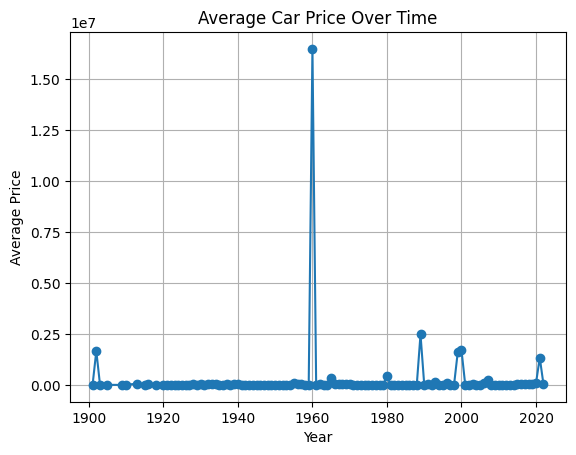

In [21]:
# Plot the average price by year
plt.plot(average_price_by_year['year'], average_price_by_year['price'], marker='o')
plt.title('Average Car Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


`The average car listing prices show significant variation across manufacturing years. In early years, such as 1901 and 1902, prices were low, but there are significant outliers like 1902 with a price of over 1.6 million. Over the decades, the average prices generally increased, with noticeable spikes in certain years like 1960 and 1999. This suggests that certain years experienced higher demand or special market conditions influencing the pricing. The most recent years, especially 2021, show a drastic rise in average prices, possibly due to inflation or increased demand for newer vehicles.`

**What is the distribution of car sales in different regions or states?**

In [22]:
# Get the median price by state
median_price_by_state = df.groupby('state')['price'].median().reset_index().sort_values(by='price', ascending=False)

print(median_price_by_state)

   state    price
49    wv  24738.0
0     ak  21999.0
26    mt  21980.0
44    ut  19900.0
1     al  18897.0
50    wy  18545.0
24    mo  17995.0
11    hi  17900.0
42    tn  17500.0
43    tx  16990.0
33    nv  16990.0
17    ky  16900.0
10    ga  16588.5
40    sc  16480.0
47    wa  16321.0
15    in  16000.0
28    nd  15990.0
16    ks  15950.0
3     az  15900.0
32    nm  15888.5
5     co  14997.0
13    id  14995.0
18    la  14995.0
36    ok  14774.0
41    sd  14500.0
20    md  14499.0
2     ar  14259.0
46    vt  13995.0
9     fl  13991.0
34    ny  13498.0
48    wi  13487.0
27    nc  13310.5
23    mn  13000.0
29    ne  12999.0
14    il  12995.0
4     ca  12988.0
12    ia  12750.0
30    nh  12600.0
25    ms  12500.0
39    ri  11995.0
19    ma  11760.0
7     dc  10995.0
22    mi  10990.0
35    oh  10950.0
31    nj  10700.0
38    pa  10500.0
6     ct   9995.0
37    or   9995.0
21    me   9995.0
8     de   9795.0
45    va   8990.0


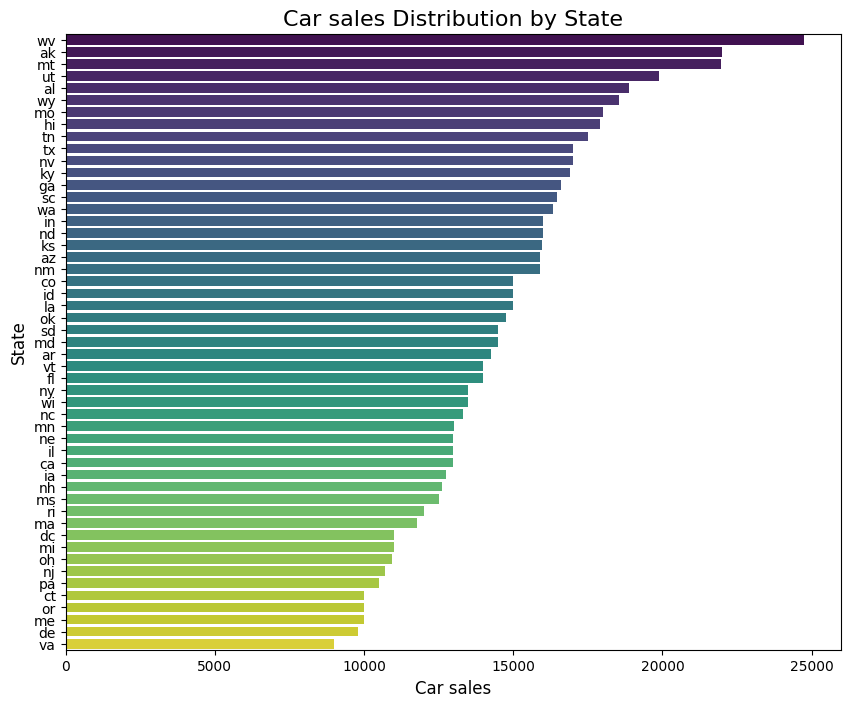

In [23]:
# Plot the distribution with a horizontal bar chart
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=median_price_by_state['price'], y=median_price_by_state['state'], palette='viridis')
plt.title('Car sales Distribution by State', fontsize=16)
plt.xlabel('Car sales', fontsize=12)
plt.ylabel('State', fontsize=12)

plt.show()

In [24]:
# Group the data by state and calculate the average price for each state
state_price_avg = df.groupby('state')['price'].mean().reset_index()

# Merge the average price data with the latitude and longitude data
state_price_avg = pd.merge(state_price_avg, df[['state', 'lat', 'long']].drop_duplicates(), on='state')

# Create a scatter_geo map to visualize the average price by state using latitude and longitude
fig = px.scatter_geo(state_price_avg, 
                     lat='lat', 
                     lon='long', 
                     color='price',
                     hover_name='state',
                     size_max=10, 
                     color_continuous_scale="Viridis",
                     labels={'price': 'Average Car Price'},
                     title='Average Car Price by State')

fig.update_geos(showcoastlines=True, coastlinecolor="Black")
fig.show()


`The distribution of car sales by state shows the median car price varies across regions. States like West Virginia (WV), Alaska (AK), and Montana (MT) have some of the highest median prices, with values exceeding $21,000. In contrast, states such as Virginia (VA) and Delaware (DE) show lower median prices around $8,995 to $9,795.`

**How does the price vary across different car manufacturers?**

In [25]:
# Get the average price by manufacturer and model
average_price_by_manufacturer = df.groupby('manufacturer')['price'].mean().reset_index().sort_values(by = 'price', ascending=False)
print(average_price_by_manufacturer)

       manufacturer          price
27    mercedes-benz  531710.557333
42            volvo  383755.147896
40           toyota  234294.682621
21             jeep  150717.819659
8         chevrolet  115676.101645
12          ferrari  107438.736842
3      aston-martin   53494.541667
39            tesla   38354.456221
6             buick   36784.954736
14             ford   36413.256896
0                NA   33242.612652
34          porsche   31946.061416
15              gmc   30405.877152
2        alfa-romeo   28237.348941
35              ram   27728.339167
36            rover   27141.248220
5               bmw   26740.261446
20           jaguar   26549.176259
4              audi   23574.849993
1             acura   19839.789861
25          lincoln   19802.274645
19         infiniti   19561.849229
7          cadillac   19439.520926
24            lexus   19206.152683
32           nissan   18827.332826
10           datsun   15149.666667
11            dodge   15004.258719
29             mini 

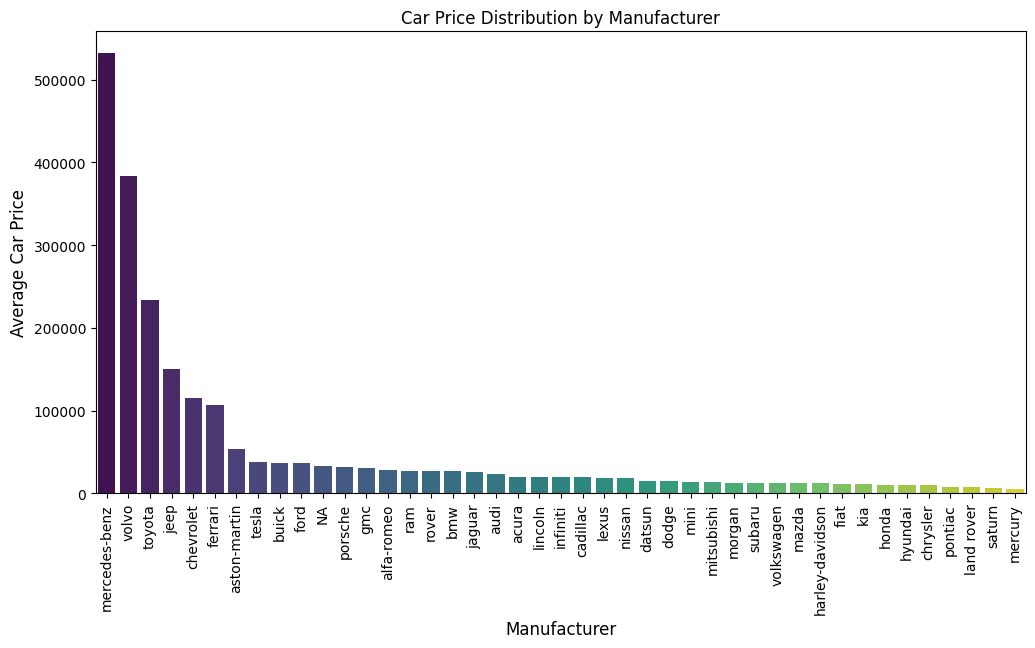

In [26]:
# Plot the car price distribution by manufacturer using a bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='manufacturer', y='price', data=average_price_by_manufacturer, palette='viridis')
plt.title('Car Price Distribution by Manufacturer')
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Average Car Price', fontsize=12)
plt.xticks(rotation=90)

plt.show()


`The average car prices vary significantly across different manufacturers. For instance, luxury brands like Mercedes-Benz and Volvo have the highest average prices, with Mercedes-Benz leading at around $531,710. In contrast, more affordable brands like Mercury, Saturn, and Pontiac show much lower average prices, ranging from $5,482 to $8,176. This indicates that premium and luxury brands tend to command higher prices due to factors like brand reputation, vehicle quality, and features, while more economical manufacturers offer lower-priced vehicles.`

**What is the relationship between vehicle condition and price?**

In [27]:
# Get the average price by condition
average_price_by_condition = df.groupby('condition')['price'].mean().reset_index().sort_values(by = 'price', ascending=False)
print(average_price_by_condition)

   condition          price
2       fair  761314.946948
0         NA   97956.840033
1  excellent   51352.348693
4   like new   36402.041978
3       good   32545.739012
5        new   23646.075920
6    salvage    3610.710000


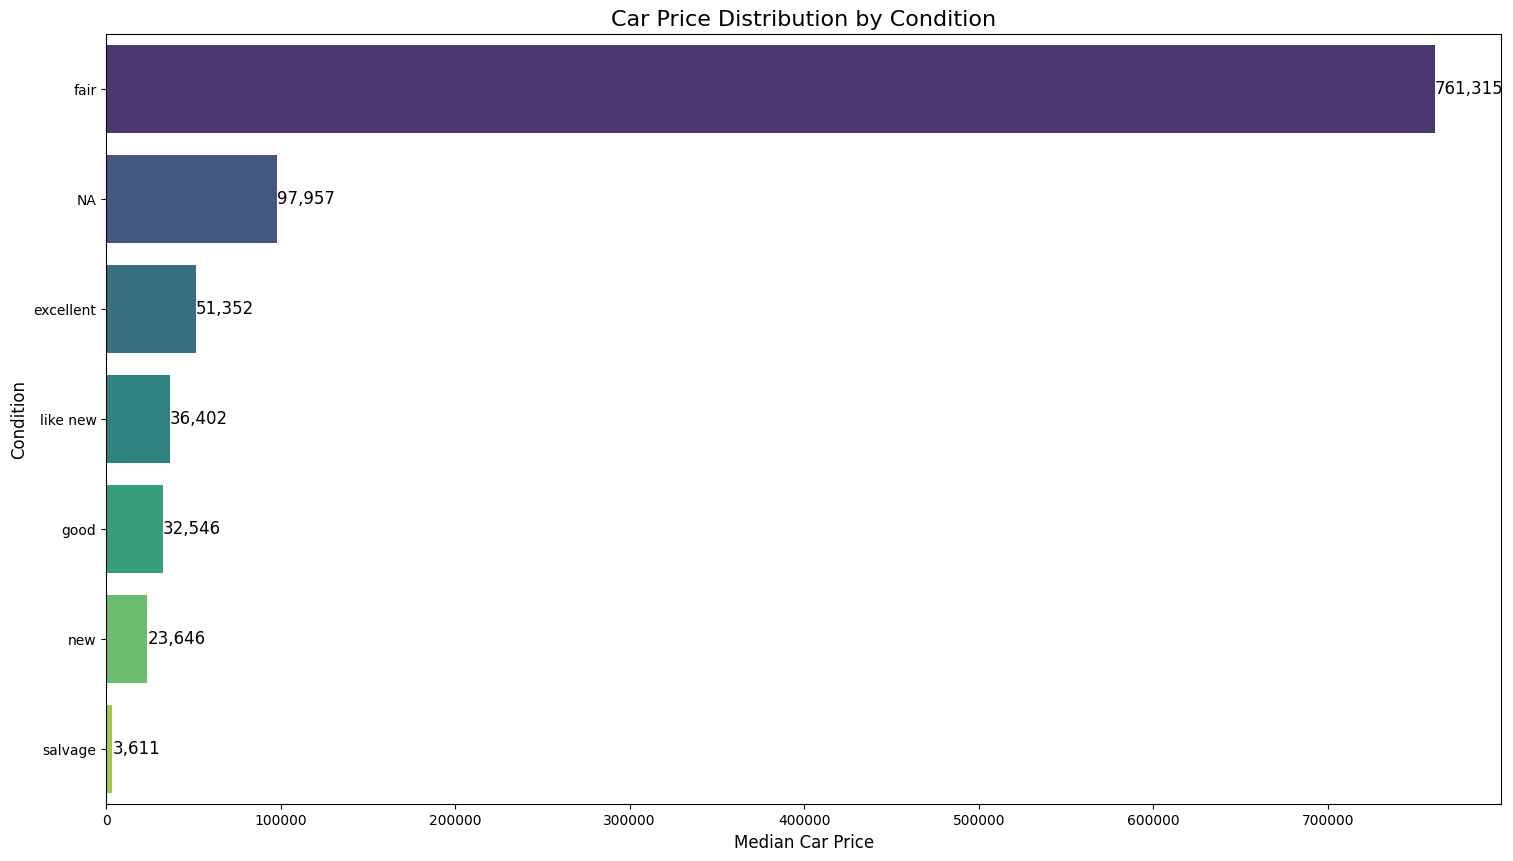

In [28]:
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='price', y='condition', data=average_price_by_condition, palette='viridis')

# Title and labels
plt.title('Car Price Distribution by Condition', fontsize=16)
plt.xlabel('Median Car Price', fontsize=12)
plt.ylabel('Condition', fontsize=12)

# Add data labels (the average price) on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=12, color='black')

plt.show()

`The relationship between vehicle condition and price shows a clear trend: cars in better condition tend to have higher prices. For example, cars labeled as fair condition have the highest average price of around $761,314, which is an anomaly, possibly due to a specific group of high-value cars in "fair" condition. However, cars listed as excellent condition have an average price of about $51,352, indicating a strong price association with good condition. Conversely, cars in salvage condition are significantly cheaper, with an average price of just $3,610. This suggests that the better the condition of the vehicle, the higher the price, with the exception of the "fair" category, which may require further analysis for anomalies.`

**How do fuel types affect vehicle prices?**

In [29]:
average_price_by_fuel = df.groupby('fuel')['price'].mean().reset_index().sort_values(by='price', ascending=False)
print (average_price_by_fuel)

       fuel          price
1    diesel  118399.318542
3       gas   73990.735330
5     other   66847.658722
2  electric   24630.695575
0        NA   16255.661566
4    hybrid   14565.792836


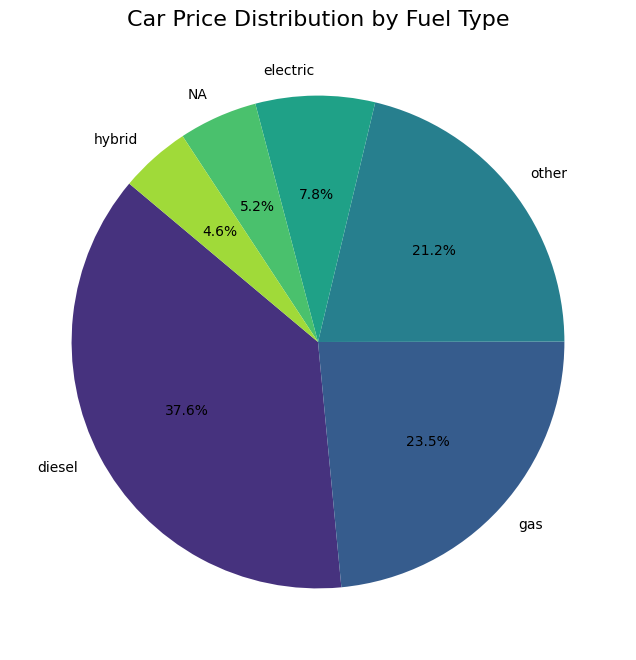

In [32]:
# Plot the distribution with a pie chart
plt.figure(figsize=(8, 8))
plt.pie(average_price_by_fuel['price'], labels=average_price_by_fuel['fuel'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(average_price_by_fuel)), startangle=140)

# Title and display the pie chart
plt.title('Car Price Distribution by Fuel Type', fontsize=16)
plt.show()

`The analysis of fuel types and their impact on vehicle prices reveals that diesel vehicles have the highest average price, followed by gasoline vehicles. Electric, hybrid, and other fuel types have lower average prices.`

**What are the most common fuel types used in the listings?**

In [33]:
# Count the occurrences of each fuel type
fuel_counts = df['fuel'].value_counts()
print(fuel_counts)


fuel
gas         355420
other        30711
diesel       29927
hybrid        5165
NA            2745
electric      1695
Name: count, dtype: int64


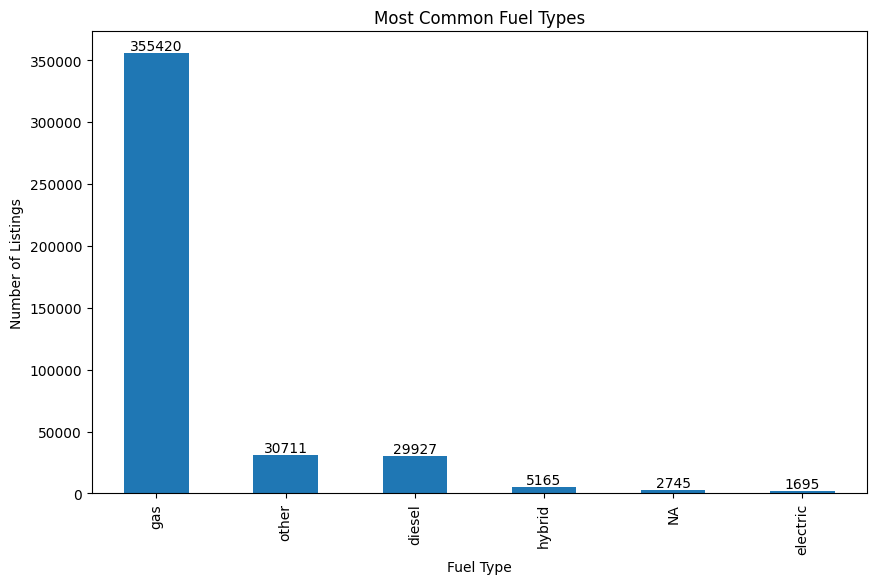

In [34]:
# Plot the distribution of fuel types
ax = fuel_counts.plot(kind='bar', title='Most Common Fuel Types', figsize=(10, 6))

# Add data labels
ax.bar_label(ax.containers[0], fontsize=10, color='black')

# Customize labels
plt.xlabel('Fuel Type')
plt.ylabel('Number of Listings')

# Show the plot
plt.show()


`The most common fuel type in the car listings is gasoline, with 355,420 occurrences. followed by "other" fuel types at 30,711. then Diesel comes with 29,927 listings. Hybrid, electric, and "NA" fuel types appear less frequently, with hybrid having 5,165 listings, electric 1,695.`

**How do fuel types affect vehicle price, condition, or popularity?**

In [35]:
# Group by fuel type and condition, then get the median price
fuel_condition_price = df.groupby(['fuel', 'condition'])['price'].median().reset_index().sort_values(by='price', ascending=False)
print(fuel_condition_price)

        fuel  condition    price
7     diesel        new  64995.0
1         NA  excellent  58900.0
28    hybrid        new  35450.0
6     diesel   like new  34995.0
2     diesel         NA  31995.0
12  electric       good  30990.0
33     other       good  27990.0
3     diesel  excellent  27500.0
5     diesel       good  21900.0
13  electric   like new  20000.0
19       gas       good  16999.0
26    hybrid       good  16990.0
30     other         NA  15999.0
21       gas        new  15900.0
31     other  excellent  15000.0
9   electric         NA  14998.0
10  electric  excellent  14000.0
0         NA         NA  13997.0
20       gas   like new  13450.0
15  electric    salvage  12875.0
16       gas         NA  11990.0
23    hybrid         NA  11900.0
17       gas  excellent  10500.0
27    hybrid   like new   9999.0
24    hybrid  excellent   8500.0
4     diesel       fair   7000.0
34     other   like new   6650.0
14  electric        new   5995.0
8     diesel    salvage   5250.0
11  electr

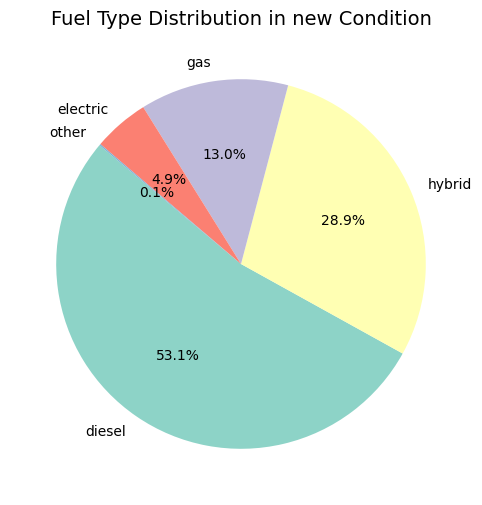

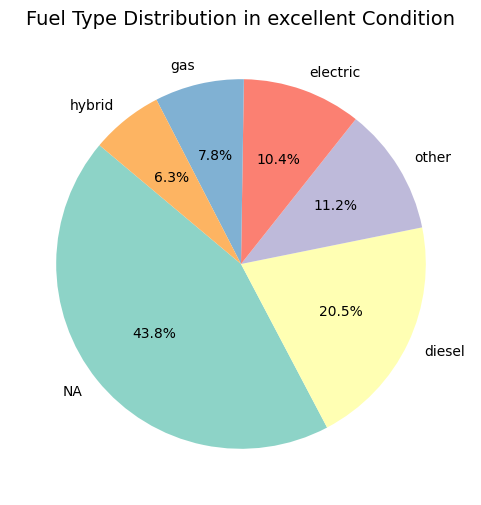

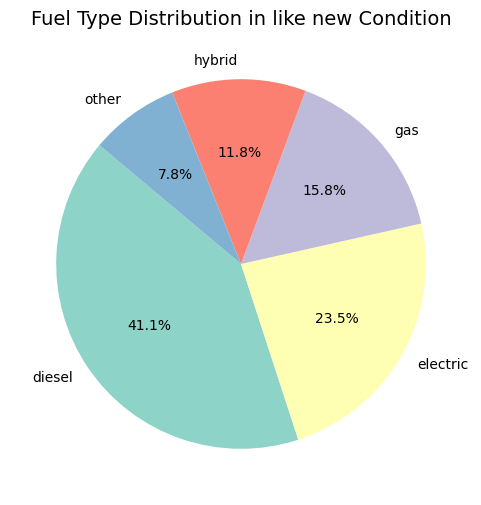

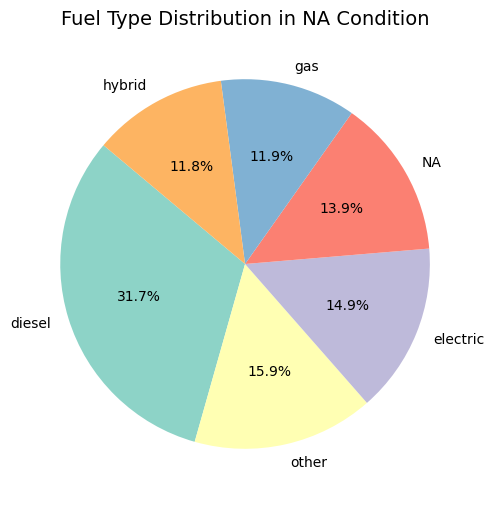

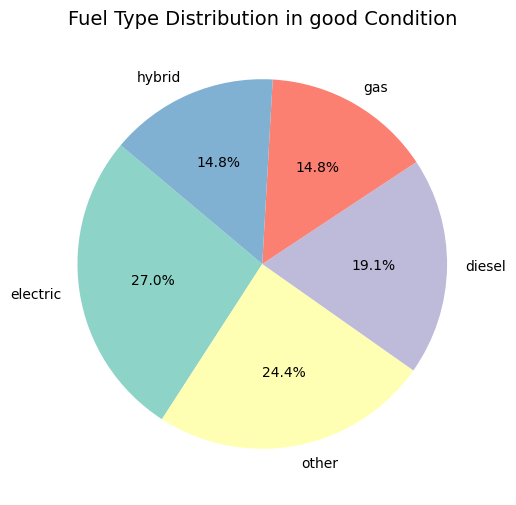

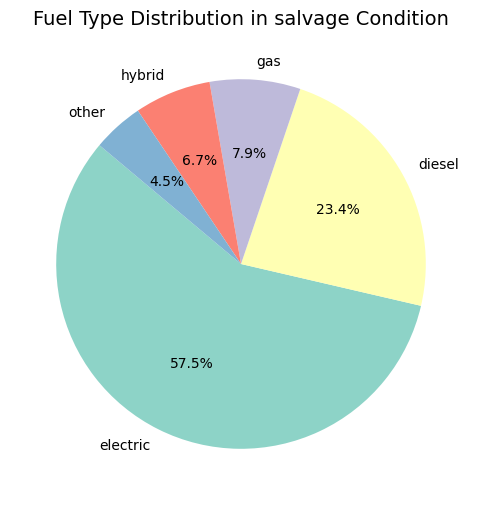

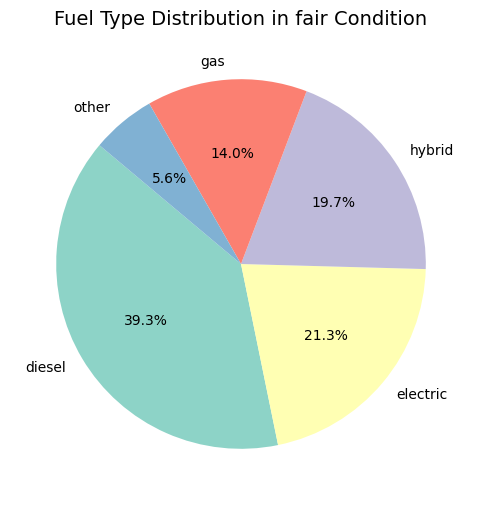

In [36]:
# Loop over each unique 'condition' to create a pie chart
unique_conditions = fuel_condition_price['condition'].unique()

# Plotting each condition
for condition in unique_conditions:
    # Filter data for the current condition
    condition_data = fuel_condition_price[fuel_condition_price['condition'] == condition]
    
    # Create a pie chart for the distribution of fuel types within this condition
    plt.figure(figsize=(6, 6))
    plt.pie(condition_data['price'], 
            labels=condition_data['fuel'], 
            autopct='%1.1f%%', 
            colors=sns.color_palette('Set3', len(condition_data)), 
            startangle=140)
    
    # Title and display the chart
    plt.title(f'Fuel Type Distribution in {condition} Condition', fontsize=14)
    plt.show()

`The relationship between fuel type, condition, and price shows that diesel vehicles in new condition command the highest median price at $64,995. Electric and hybrid vehicles also have relatively high prices when in new or excellent conditions, with prices around $35,000 to $59,000. On the lower end, gas vehicles in fair or salvage condition have the lowest median prices, with values dropping to as low as $1,500 for hybrid salvage cars. The condition of the car significantly impacts the price across all fuel types.`

**What are the most common manufacturers and models listed on Craigslist?**

In [37]:
# Get the top manufacturers and models
manufacturer_counts = df['manufacturer'].value_counts().head(10)
model_counts = df['model'].value_counts().head(10)

In [38]:
print(manufacturer_counts)

manufacturer
ford         70982
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
jeep         19014
ram          18342
gmc          16785
NA           16440
bmw          14699
Name: count, dtype: int64


In [39]:
print(model_counts)

model
f-150             8009
NA                5209
silverado 1500    5140
1500              4211
camry             3135
silverado         3023
accord            2969
wrangler          2848
civic             2799
altima            2779
Name: count, dtype: int64


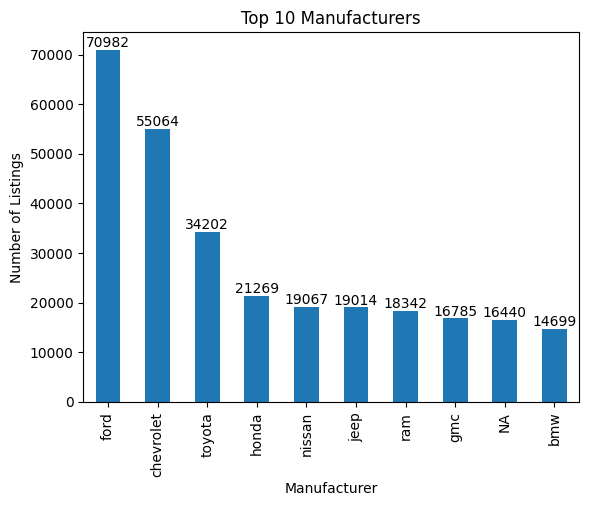

In [40]:
# Plot the most common manufacturers
ax = manufacturer_counts.plot(kind='bar', title='Top 10 Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Listings')

# Add data labels
ax.bar_label(ax.containers[0], fontsize=10, color='black')

plt.show()

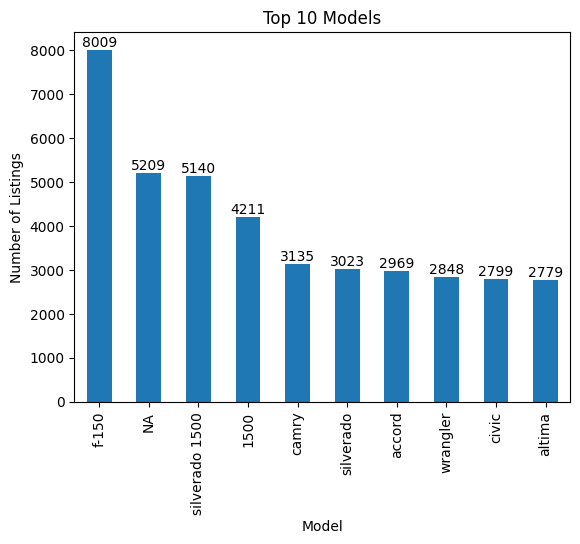

In [41]:
# Plot the most common models
ax = model_counts.plot(kind='bar', title='Top 10 Models')
plt.xlabel('Model')
plt.ylabel('Number of Listings')

ax.bar_label(ax.containers[0], fontsize=10, color='black')

plt.show()

`The most common manufacturers listed on Craigslist are Ford, Chevrolet, and Toyota, with Ford leading at 70,982 listings, followed by Chevrolet (55,064) and Toyota (34,202). Other notable manufacturers include Honda, Nissan, and Jeep.`

`In terms of models, the Ford F-150 tops the list with 8,009 listings, closely followed by the Chevrolet Silverado 1500 at 5,140. Other popular models include the Ram 1500, Toyota Camry, and Chevrolet Silverado.`

**What are the most common transmission types (manual vs automatic) in the dataset?**

In [42]:
# Count the transmission types
transmission_counts = df['transmission'].value_counts().sort_values(ascending=True)
print(transmission_counts)

transmission
NA             2488
manual        25092
other         62651
automatic    335432
Name: count, dtype: int64


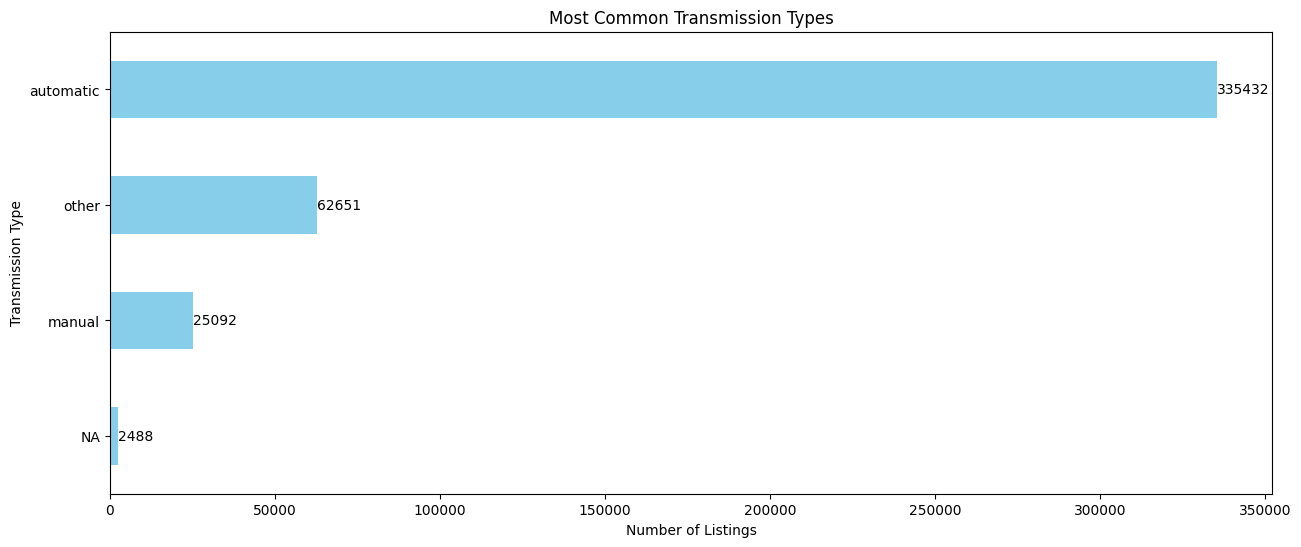

In [43]:
# Plot the distribution of transmission types
plt.figure(figsize=(15, 6))
ax = transmission_counts.plot(kind='barh', title='Most Common Transmission Types', color='skyblue')

# Set labels for axes
plt.xlabel('Number of Listings')
plt.ylabel('Transmission Type')

# Add data labels
for index, value in enumerate(transmission_counts):
    ax.text(value, index, f'{value}', va='center', fontsize=10)

# Show the plot
plt.show()


`The dataset shows that automatic transmissions are the most common, with 335,432 listings, followed by "other" transmission types, which account for 62,651 listings. Manual transmissions have 25,092 listings. indicating missing or unspecified transmission data. This indicates that automatic transmissions dominate the market, with manual transmissions being less common in comparison.`

**How do vehicle prices vary between different transmission types?**

In [44]:
# Get the mean price by transmission type
mean_price_by_transmission = df.groupby('transmission')['price'].mean().reset_index().sort_values(by='price', ascending=False)
print(mean_price_by_transmission)

  transmission          price
2       manual  198596.217719
1    automatic   74994.813515
3        other   30013.914590
0           NA   14649.034968


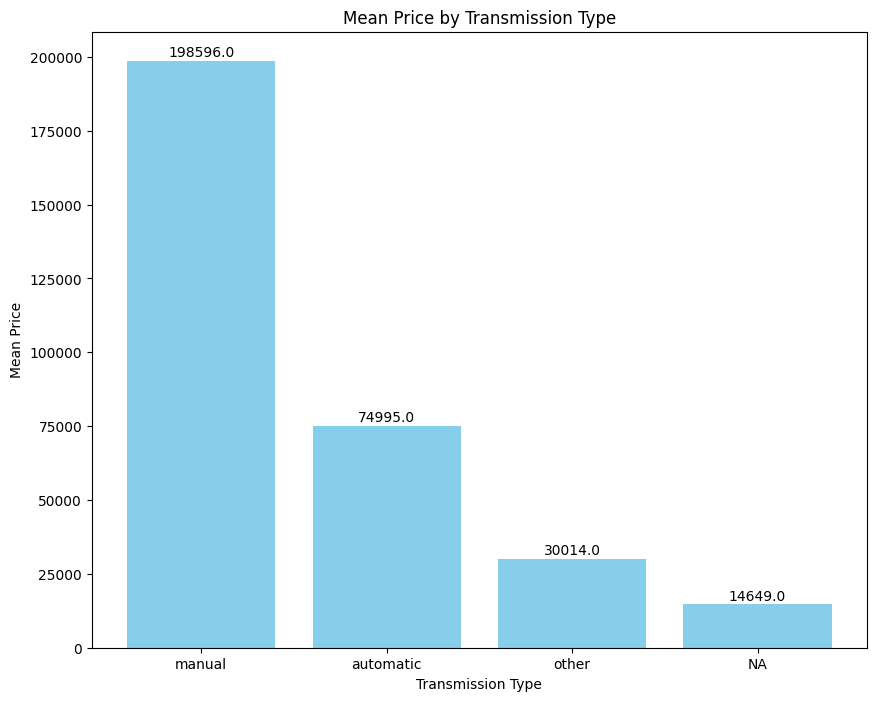

In [45]:
# Plot the mean price by transmission type
plt.figure(figsize=(10, 8))
bars = plt.bar(mean_price_by_transmission['transmission'], mean_price_by_transmission['price'], color='skyblue')

# Set axis labels and title
plt.xlabel('Transmission Type')
plt.ylabel('Mean Price')
plt.title('Mean Price by Transmission Type')

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, round(yval, 0), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()



`The analysis shows that vehicles with manual transmissions have the highest average price at $198,596.22, followed by automatic transmissions with an average price of $74,994.81. Vehicles labeled as "other" transmission types have an average price of $30,013.91, and those with missing or unspecified transmission information (NA) have the lowest average price at $14,649.03. This suggests that manual transmission vehicles, while less common, tend to be more expensive on average compared to automatic ones.`

**Is there a price difference between vehicles with different drive types (e.g., 4WD vs FWD)?**

In [46]:
# Get the average price by drive type
average_price_by_drive = df.groupby('drive')['price'].mean().reset_index().sort_values(by='price', ascending=False)
print(average_price_by_drive)

  drive          price
0   4wd  112204.259752
1    NA  102101.060918
3   rwd   40799.701183
2   fwd   15242.996604


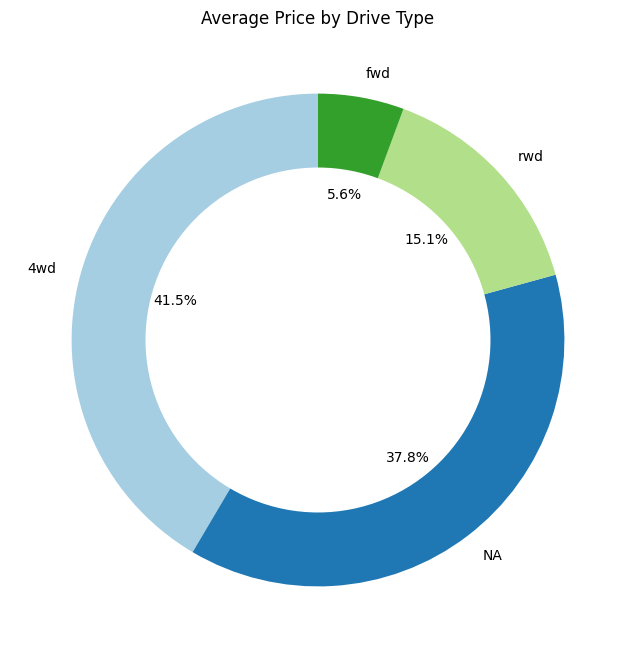

In [47]:
plt.figure(figsize=(8, 8))
plt.pie(average_price_by_drive['price'], labels=average_price_by_drive['drive'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Create a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title
plt.title('Average Price by Drive Type')

plt.show()

`The analysis indicates a significant price difference between vehicles with different drive types. Vehicles with 4WD (four-wheel drive) have the highest average price at $112,204.26. with an average price of $102,101.06. RWD (rear-wheel drive) vehicles have a much lower average price at $40,799.70, while FWD (front-wheel drive) vehicles have the lowest average price at $15,242.99. This suggests that 4WD vehicles tend to be more expensive, likely due to their enhanced capabilities and suitability for off-road conditions.`

**What are the most common paint colors in the dataset?**

In [48]:
# Count the paint colors
paint_color_counts = df['paint_color'].value_counts()
print(paint_color_counts)


paint_color
NA        130042
white      78922
black      62661
silver     42834
blue       31155
red        30362
grey       24261
green       7340
custom      6697
brown       6580
yellow      2140
orange      1982
purple       687
Name: count, dtype: int64


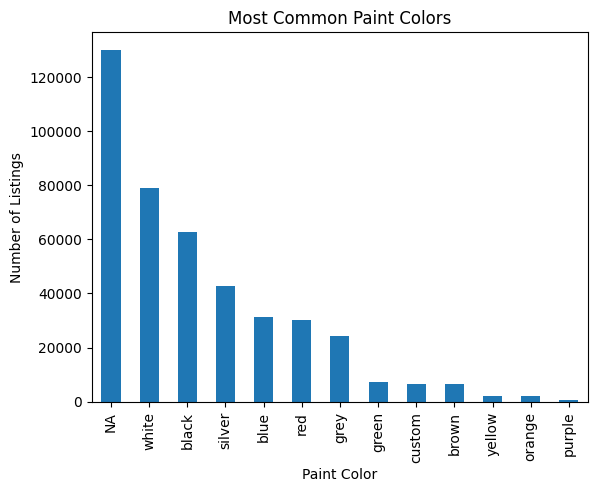

In [49]:
# Plot the distribution of paint colors
paint_color_counts.plot(kind='bar', title='Most Common Paint Colors')
plt.xlabel('Paint Color')
plt.ylabel('Number of Listings')
plt.show()


`The most common paint colors in the dataset are predominantly neutral shades, White leads as the most common color with 78,922 listings, followed by Black (62,661), Silver (42,834), and Blue (31,155). Other colors like Red (30,362), Grey (24,261), and Green (7,340) are also common, though much less frequent. Additionally, more unique colors such as Custom (6,697), Brown (6,580), Yellow (2,140), Orange (1,982), and Purple (687) are seen in fewer listings.`

**What are the most common vehicle sizes and types listed?**

In [50]:
# Count the vehicle types
type_counts = df['type'].value_counts()
print(type_counts)

type
NA             92661
sedan          86860
SUV            76980
pickup         43128
truck          35279
other          22105
coupe          19181
hatchback      16588
wagon          10751
van             8457
convertible     7722
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64


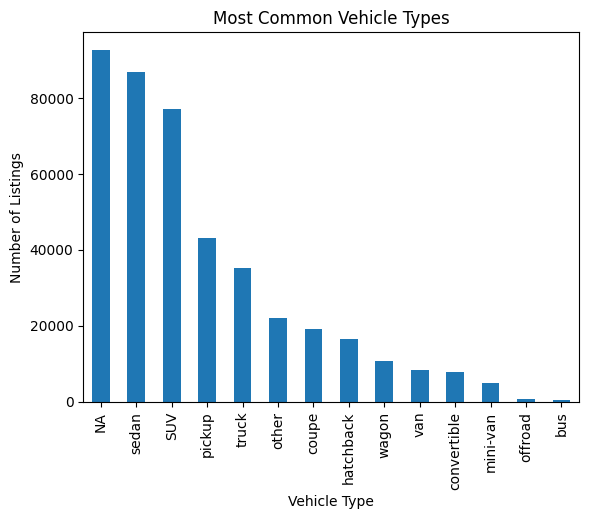

In [51]:
# Plot the distribution of vehicle types
type_counts.plot(kind='bar', title='Most Common Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Listings')
plt.show()


`The most common vehicle types in the dataset are sedans (86,860 listings), followed by SUVs (76,980) and pickups (43,128). Other types include trucks (35,279), coups (19,181), and hatchbacks (16,588). Less common types like vans (8,457) and convertibles (7,722) also appear, with NA (missing data) in 92,661 entries.`

**How do vehicle sizes/types correlate with price and condition?**

In [52]:
# Get the average price by vehicle type
price_by_type = df.groupby('type')['price'].mean().reset_index().sort_values(by=['price'], ascending=False)
print(price_by_type)

           type          price
0            NA  204998.966599
9        pickup  145559.578464
1           SUV   34450.888711
11        truck   29383.577993
8         other   24749.116444
4         coupe   21919.163391
3   convertible   19982.749029
12          van   17179.710536
10        sedan   15934.249885
7       offroad   15813.093596
5     hatchback   14383.255848
2           bus   14105.617021
13        wagon   13273.909683
6      mini-van    9234.087668


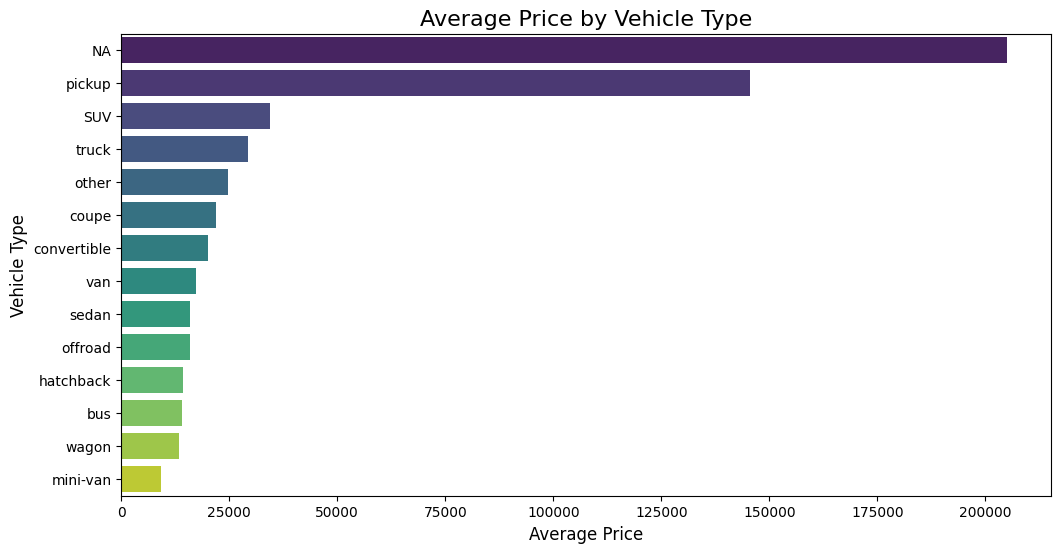

In [53]:
# Plot the average price by vehicle type
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='type', data=price_by_type, palette='viridis', orient='h')

# Set title and labels
plt.title('Average Price by Vehicle Type', fontsize=16)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Vehicle Type', fontsize=12)

# Show the plot
plt.show()

`Vehicle sizes and types show a clear correlation with prices in the dataset. Among vehicle types, pickups have the second-highest price at $145,559, followed by SUVs at $34,450. On the other hand, vans and minivans are among the lowest-priced vehicles, with prices averaging around $17,180 and $9,234, respectively. Sedans also appear to be relatively affordable, with an average price of $15,934. Types like trucks, coups, and convertibles fall in between, indicating that larger or more specialized vehicle types tend to have higher prices.`

___
## Conclusion

**Q1: What are the top regions/states with the highest number of listings?**  
- `The top regions with the highest number of listings are dominated by areas like Columbus, Jacksonville, and Spokane / Coeur d'Alene. Columbus leads with 3,608 listings, followed closely by Jacksonville with 3,560, indicating a high concentration of car listings in these regions. These regions may have larger populations or higher demand for cars, which could explain the number of listings in these areas.`

**Q2: How do car listing prices vary by manufacturing year?**  
- `The average car listing prices show significant variation across manufacturing years. In early years, such as 1901 and 1902, prices were low, but there are significant outliers like 1902 with a price of over 1.6 million. Over the decades, the average prices generally increased, with noticeable spikes in certain years like 1960 and 1999. This suggests that certain years experienced higher demand or special market conditions influencing the pricing. The most recent years, especially 2021, show a drastic rise in average prices, possibly due to inflation or increased demand for newer vehicles.`

**Q3: What is the distribution of car sales in different regions or states?**  
- `The distribution of car sales by state shows the median car price varies across regions. States like West Virginia (WV), Alaska (AK), and Montana (MT) have some of the highest median prices, with values exceeding $21,000. In contrast, states such as Virginia (VA) and Delaware (DE) show lower median prices around $8,995 to $9,795.`

**Q4: How does the price vary across different car manufacturers?**  
- `The average car prices vary significantly across different manufacturers. For instance, luxury brands like Mercedes-Benz and Volvo have the highest average prices, with Mercedes-Benz leading at around $531,710. In contrast, more affordable brands like Mercury, Saturn, and Pontiac show much lower average prices, ranging from $5,482 to $8,176. This indicates that premium and luxury brands tend to command higher prices due to factors like brand reputation, vehicle quality, and features, while more economical manufacturers offer lower-priced vehicles.`

**Q5: What is the relationship between vehicle condition and price?**  
- `The relationship between vehicle condition and price shows a clear trend: cars in better condition tend to have higher prices. For example, cars labeled as fair condition have the highest average price of around $761,314, which is an anomaly, possibly due to a specific group of high-value cars in "fair" condition. However, cars listed as excellent condition have an average price of about $51,352, indicating a strong price association with good condition. Conversely, cars in salvage condition are significantly cheaper, with an average price of just $3,610. This suggests that the better the condition of the vehicle, the higher the price, with the exception of the "fair" category, which may require further analysis for anomalies.`

**Q6: How do fuel types affect vehicle prices?**  
- `The analysis of fuel types and their impact on vehicle prices reveals that diesel vehicles have the highest average price, followed by gasoline vehicles. Electric, hybrid, and other fuel types have lower average prices.`

**Q7: What are the most common fuel types used in the listings?**  
- `The most common fuel type in the car listings is gasoline, with 355,420 occurrences. followed by "other" fuel types at 30,711. then Diesel comes with 29,927 listings. Hybrid, electric, and "NA" fuel types appear less frequently, with hybrid having 5,165 listings, electric 1,695.`

**Q8: How do fuel types affect vehicle price, condition, or popularity?**  
- `The relationship between fuel type, condition, and price shows that diesel vehicles in new condition command the highest median price at $64,995. Electric and hybrid vehicles also have relatively high prices when in new or excellent conditions, with prices around $35,000 to $59,000. On the lower end, gas vehicles in fair or salvage condition have the lowest median prices, with values dropping to as low as $1,500 for hybrid salvage cars. The condition of the car significantly impacts the price across all fuel types.`

**Q9: What are the most common manufacturers and models listed on Craigslist?**  
- `The most common manufacturers listed on Craigslist are Ford, Chevrolet, and Toyota, with Ford leading at 70,982 listings, followed by Chevrolet (55,064) and Toyota (34,202). Other notable manufacturers include Honda, Nissan, and Jeep.`
- `In terms of models, the Ford F-150 tops the list with 8,009 listings, closely followed by the Chevrolet Silverado 1500 at 5,140. Other popular models include the Ram 1500, Toyota Camry, and Chevrolet Silverado.`

**Q10: What are the most common transmission types (manual vs automatic) in the dataset?**  
- `The dataset shows that automatic transmissions are the most common, with 335,432 listings, followed by "other" transmission types, which account for 62,651 listings. Manual transmissions have 25,092 listings. indicating missing or unspecified transmission data. This indicates that automatic transmissions dominate the market, with manual transmissions being less common in comparison.`

**Q11: How do vehicle prices vary between different transmission types?**  
- `The analysis shows that vehicles with manual transmissions have the highest average price at $198,596.22, followed by automatic transmissions with an average price of $74,994.81. Vehicles labeled as "other" transmission types have an average price of $30,013.91, and those with missing or unspecified transmission information (NA) have the lowest average price at $14,649.03. This suggests that manual transmission vehicles, while less common, tend to be more expensive on average compared to automatic ones.`

**Q12: Is there a price difference between vehicles with different drive types (e.g., 4WD vs FWD)?**  
- `The analysis indicates a significant price difference between vehicles with different drive types. Vehicles with 4WD (four-wheel drive) have the highest average price at $112,204.26. with an average price of $102,101.06. RWD (rear-wheel drive) vehicles have a much lower average price at $40,799.70, while FWD (front-wheel drive) vehicles have the lowest average price at $15,242.99. This suggests that 4WD vehicles tend to be more expensive, likely due to their enhanced capabilities and suitability for off-road conditions.`

**Q13: What are the most common paint colors in the dataset?**  
- `The most common paint colors in the dataset are predominantly neutral shades, White leads as the most common color with 78,922 listings, followed by Black (62,661), Silver (42,834), and Blue (31,155). Other colors like Red (30,362), Grey (24,261), and Green (7,340) are also common, though much less frequent. Additionally, more unique colors such as Custom (6,697), Brown (6,580), Yellow (2,140), Orange (1,982), and Purple (687) are seen in fewer listings.`

**Q14: What are the most common vehicle sizes and types listed?**  
- `The most common vehicle types in the dataset are sedans (86,860 listings), followed by SUVs (76,980) and pickups (43,128). Other types include trucks (35,279), coups (19,181), and hatchbacks (16,588). Less common types like vans (8,457) and convertibles (7,722) also appear, with NA (missing data) in 92,661 entries.`

**Q15: How do vehicle sizes/types correlate with price and condition?**
- `Vehicle sizes and types show a clear correlation with prices in the dataset. Among vehicle types, pickups have the second-highest price at $145,559, followed by SUVs at $34,450. On the other hand, vans and minivans are among the lowest-priced vehicles, with prices averaging around $17,180 and $9,234, respectively. Sedans also appear to be relatively affordable, with an average price of $15,934. Types like trucks, coups, and convertibles fall in between, indicating that larger or more specialized vehicle types tend to have higher prices.`

> **"This project was entirely developed by **Bassam El-Shoraa**"**.